## Income Inequality Data Analytics

This notebook visualizes income inequality data geospatially, comparing various years altogether.

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
world_data = gpd.read_file('../world-data.geojson', driver='geojson', crs=4326)
# Updates to names so merge finds as many countries as possible
world_data['name'] = np.where(world_data['name'].str.contains('United States'), 'United States', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains('Dem. Rep. Congo'), 'Congo, Dem. Rep.', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains('Congo'), 'Congo, Rep.', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Côte d'Ivoire"), "Cote d'Ivoire", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("eSwatini"), "Swaziland", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Slovakia"), "Slovak Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Bosnia and Herz."), "Bosnia and Herzegovina", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Laos"), "Lao", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Central African Rep."), "Central African Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Czechia"), "Czech Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Kyrgyzstan"), "Kyrgyz Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Macedonia"), "North Macedonia", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("S. Sudan"), "South Sudan", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Eq. Guinea"), "Equatorial Guinea", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Dominican Rep."), "Dominican Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Solomon Is."), "Solomon Islands", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("N. Cyprus"), "Cyprus", world_data['name'])

In [24]:
world_data[world_data['name'].str.contains('Congo')].head()

,iso_a3,name,continent,geometry
11,COD,"Congo, Rep.",Africa,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
67,COG,"Congo, Rep.",Africa,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ..."


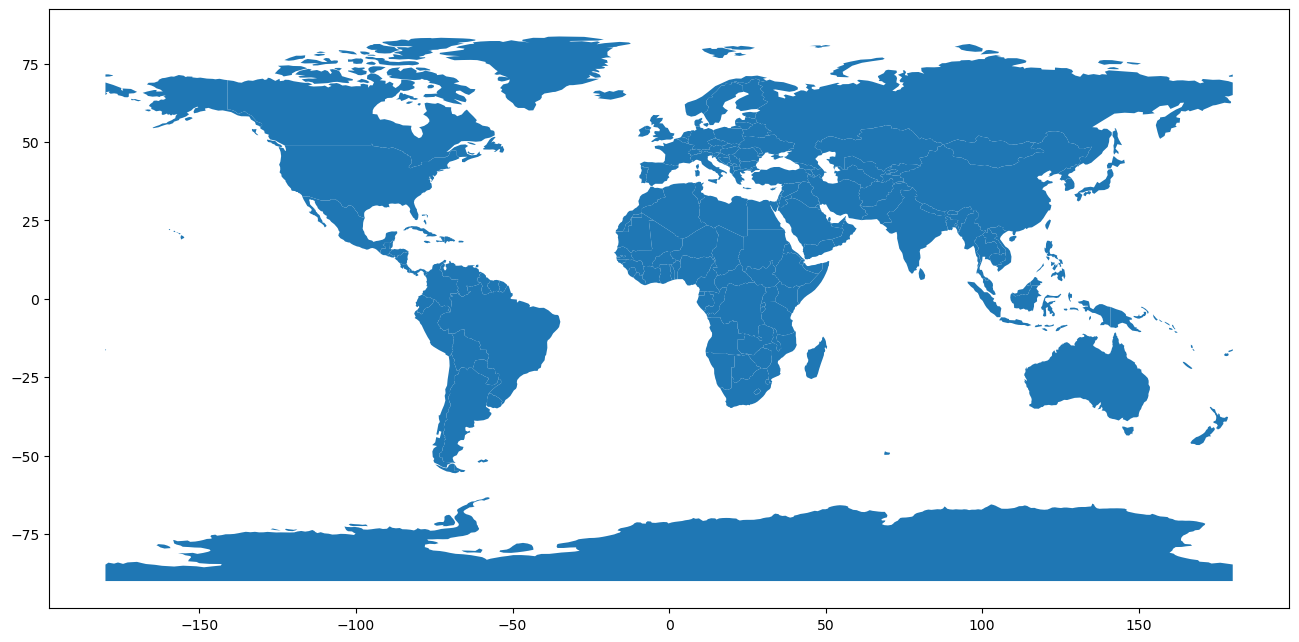

In [25]:
world_data.plot(figsize=(16,8))
plt.show()

In [26]:
continents = pd.read_csv('../CSV/continent_country.csv')
continents[continents['country'].str.contains('K')].head()

,continent,country
24,Africa,Kenya
79,Asia,"Hong Kong, China"
80,Asia,"Korea, Dem. Rep."
81,Asia,"Korea, Rep."
99,Asia,Kuwait


In [27]:
gini_data = pd.read_csv('../CSV/gini.csv')

In [28]:
gini_data.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [29]:
gini_data = gini_data.melt(id_vars=['country'], var_name='year', value_name='gini')

In [30]:
#gini_data.query('country == "France"').head()
#gini_data[gini_data['country'].str.contains('State')].head()
#gini_data['country'].unique()

In [31]:
gini_world_data = world_data.merge(gini_data, left_on='name', right_on='country', how='left')

In [32]:
gini_world_data[gini_world_data['country'].isna()]

,iso_a3,name,continent,geometry,country,year,gini
482,ESH,W. Sahara,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
4580,FLK,Falkland Is.,South America,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN
4822,GRL,Greenland,North America,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",NaN,NaN,NaN
4823,ATF,Fr. S. Antarctic Lands,Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN
9885,PRI,Puerto Rico,North America,"POLYGON ((-66.28243 18.51476, -65.77130 18.426...",NaN,NaN,NaN
31094,NCL,New Caledonia,Oceania,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7...",NaN,NaN,NaN
32300,TWN,Taiwan,Asia,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",NaN,NaN,NaN
36639,ATA,Antarctica,Antarctica,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,NaN
38327,ABV,Somaliland,Africa,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaN,NaN
39774,OSA,Kosovo,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN


In [33]:
gini_world_data.query('year == "2002"').head()
#gini_world_data[gini_world_data['name'].str.contains('State')].head()
#gini_world_data.head()

,iso_a3,name,continent,geometry,country,year,gini
202,FJI,Fiji,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2002,38.2
443,TZA,Tanzania,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2002,37.9
685,CAN,Canada,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2002,33.5
926,USA,United States,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2002,40.5
1167,KAZ,Kazakhstan,Asia,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2002,34.5


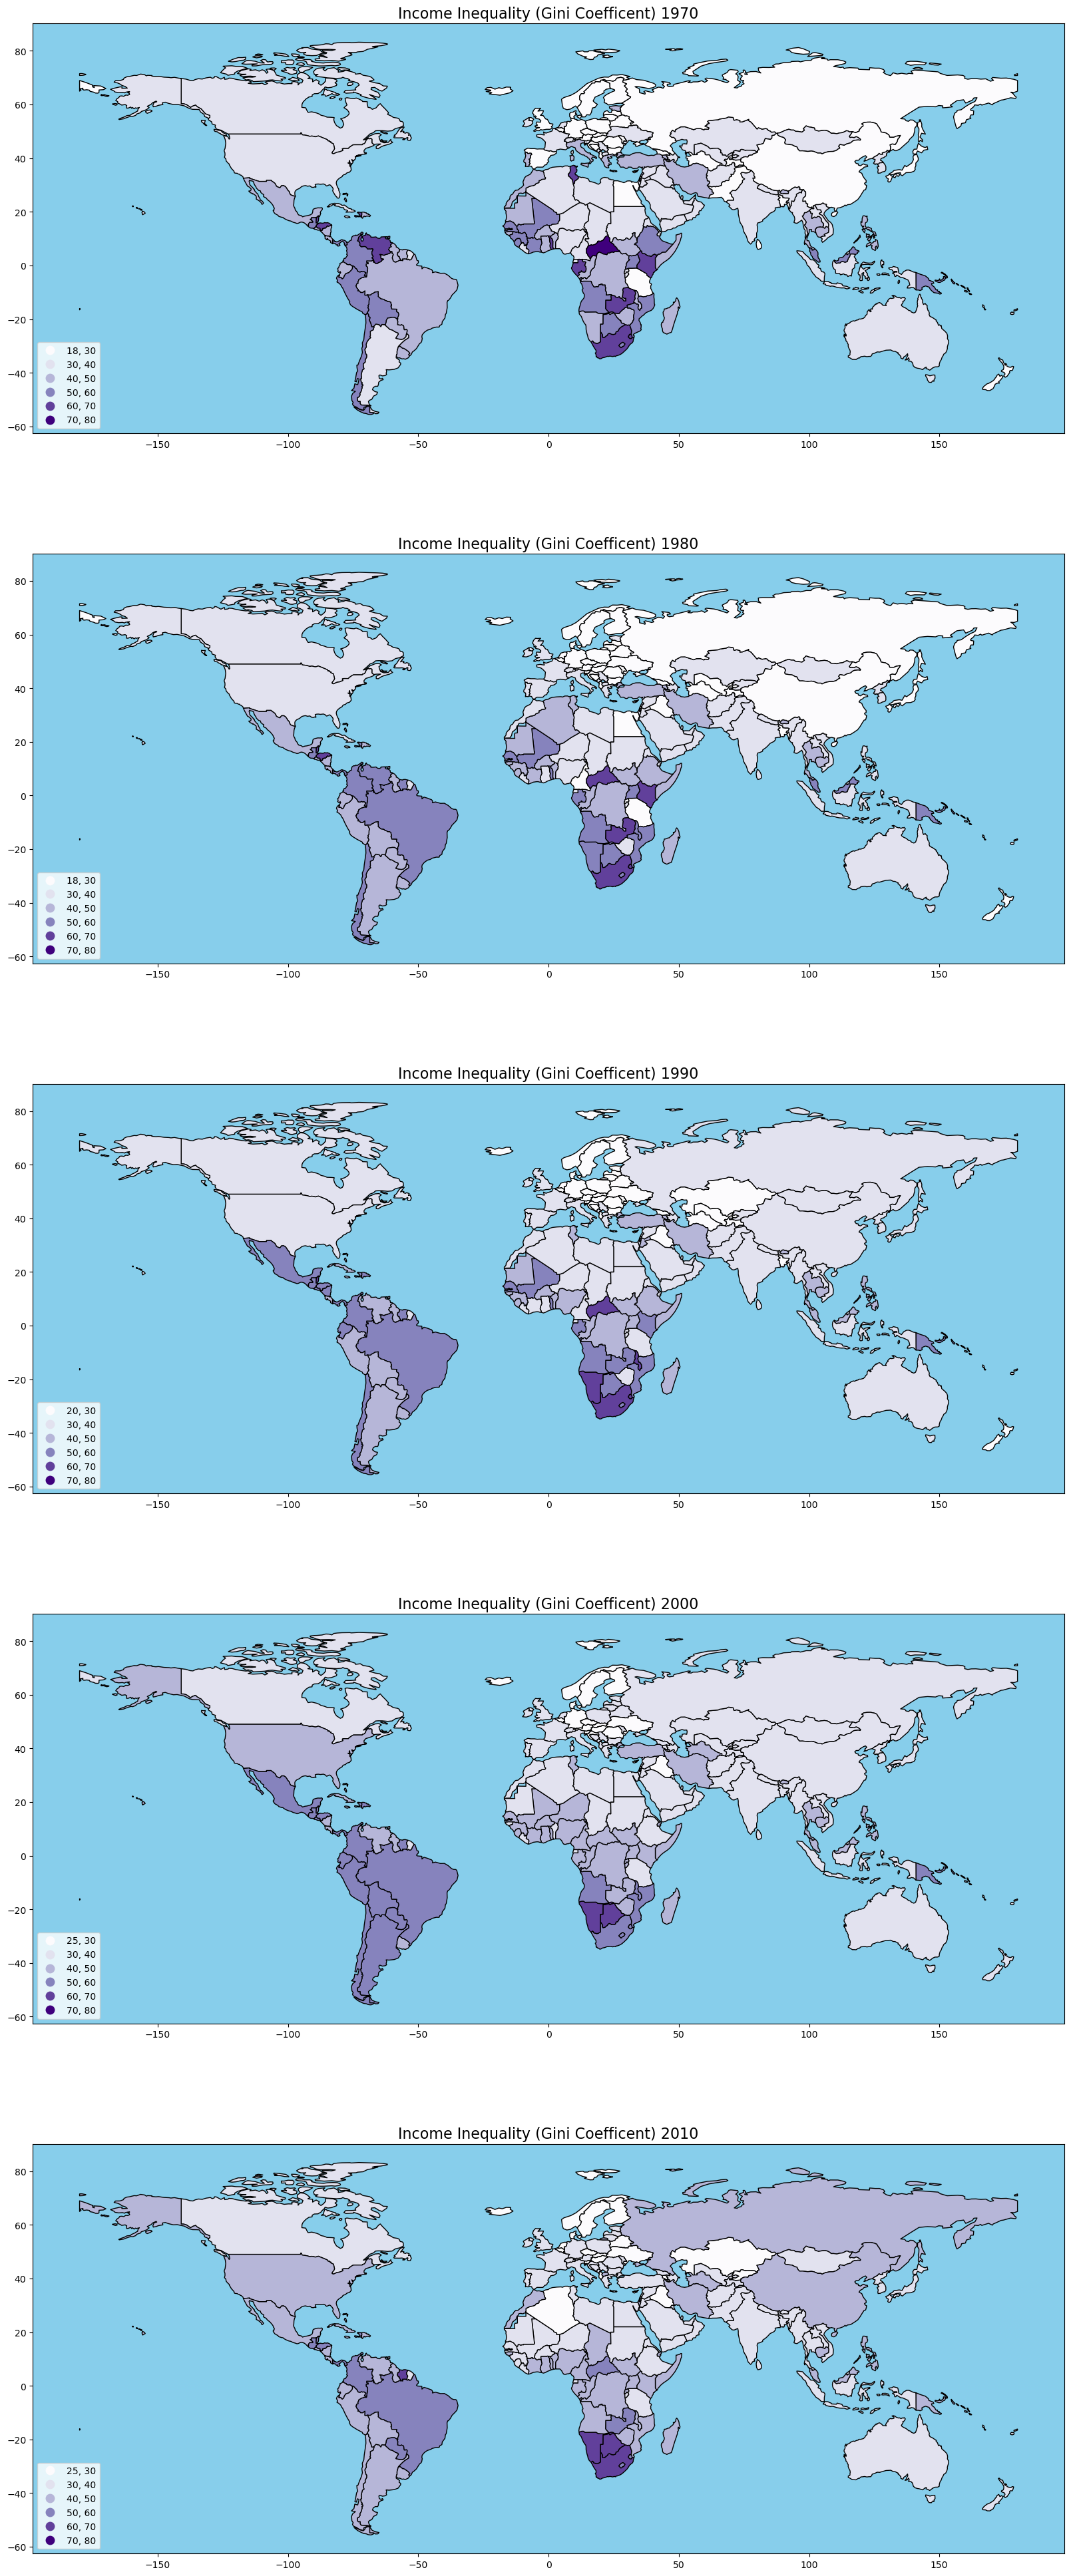

In [34]:
years = [1970, 1980, 1990, 2000, 2010]
classifications = dict(bins=[30,40,50,60,70,80])

fig, axs = plt.subplots(len(years), 1, figsize=(20, 10*len(years)))

for ndx, yr in enumerate(years):
    ax1 = axs[ndx]
    ax1.set_facecolor('skyblue')
    ax1.set_title(f'Income Inequality (Gini Coefficent) {yr}', fontsize=16)
    gini_world_data.query(f'year == "{yr}"').plot(
        ax=ax1,
        column='gini',
        edgecolor='black',
        categorical=False,
        scheme='User_Defined',
        classification_kwds=classifications,
        #k=6,
        #scheme='fisher_jenks',
        cmap='Purples',
        legend=True,
        legend_kwds={'loc': 'lower left', 'fmt': '{:,.0f}'}
        #,
        #missing_kwds={'color':'red','edgecolor': 'brwon', 'hatch': '///', 'label': 'Missing values'}
    )
plt.show()